In [71]:
import numpy as np



def get_next_state(current_state, current_t, delta_t, arguments):
    
    """
    current_state = tuple of 4 floats, denoting S, E, I, R at the current state.
    arguments = tuple of 5 floatings, denoting birth_rate, death_rate, beta, alpha, gamma, N
    """
    S, E, I, R = current_state
    birth_rate, death_rate, beta, alpha, gamma, N = arguments
    next_s = S + delta_t*((birth_rate(current_t) - (death_rate(current_t) * S) - (beta(current_t) * (I/N) * S)))
    next_e = E + delta_t*(beta(current_t) * (I/N) * S - (death_rate(current_t) + alpha(current_t)) * E)
    next_i = I + delta_t*((alpha(current_t) * E) - ((gamma(current_t) + death_rate(current_t)) * I))
    next_r = R + delta_t*((gamma(current_t) * I) - (death_rate(current_t) * R))
    
    return next_s, next_e, next_i, next_r






    


In [72]:
import matplotlib.pyplot as plt

def plot_SEIR(rate_of_change_function, start_state, parameters, t_start = 0, t_end = 100, delta_t = 1):
    current_state = start_state
    state = [current_state]
    for current_t in np.arange(start_t + delta_t, last_t, delta_t):
        next_state = rate_of_change_function(current_state, current_t, delta_t, parameters)
        current_state = next_state
        state.append(current_state)
        
    all_s = [i[0] for i in state]
    all_e = [i[1] for i in state]
    all_i = [i[2] for i in state]
    all_r = [i[3] for i in state]
    all_t = list(np.arange(start_t, last_t, delta_t))
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(all_t, all_s, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(all_t, all_e, 'y', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(all_t, all_i, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(all_t, all_r, 'g', alpha=0.7, linewidth=2, label='Recovered')
    ax.set_xlabel('Time (days)')
    legend = ax.legend(borderpad=2.0)
    plt.show()

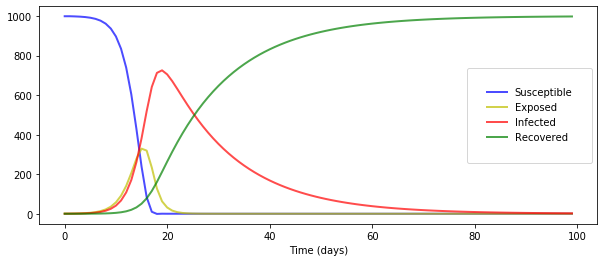

In [73]:
birth_rate = lambda t: 0
death_rate = lambda t: 0
beta = lambda t:  1.7 # rate of infection per infected person
alpha = lambda t: 1 / 2  #incubation rate of 2, i.e. 2 days from exposed to infected
gamma = lambda t: 1 / 14 #time to recover
N = 1000


current_state = (N - 1, 1, 0, 0)
parameters  = (birth_rate, death_rate, beta, alpha, gamma, N)

plot_SEIR(get_next_state, current_state, parameters)


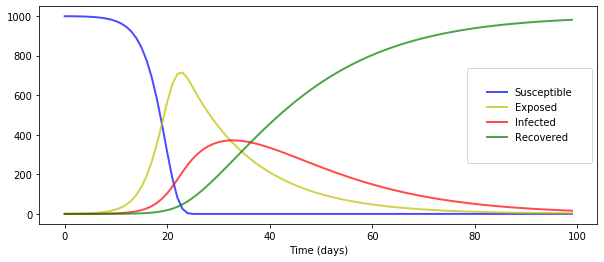

In [90]:
birth_rate = lambda t: 0
death_rate = lambda t: 0
beta = lambda t:  4 if (t < 50) else 1 # rate of infection per infected person1
alpha = lambda t: 1 / 14  #incubation rate of 2, i.e. 2 days from exposed to infected
gamma = lambda t: 1 / 14 #time to recover
N = 1000

current_state = (N - 1, 1, 0, 0)
parameters  = (birth_rate, death_rate, beta, alpha, gamma, N)

plot_SEIR(get_next_state, current_state, parameters)
